Task: To predict the Price of the Ethereum Coin In USD 

Ethereum Coin (USD) Forecasting using ARIMA MODEL

In [159]:
# For Live data Feed through Yahoo finance
!pip install yfinance

In [160]:
import yfinance as yf # Yahoo Import
import pandas as pd
import numpy as np
from scipy import stats # Stats
import statsmodels.api as sm # Here we will be using StatsModel for ARIMA
import warnings # Warnings
from itertools import product

In [161]:
# Importing data
data = yf.download("ETH-EUR", start="2019-09-18", end="2021-05-30")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-18,187.862411,196.486679,188.634079,191.664566,191.664566,8336536093
2019-09-19,191.532379,201.739441,185.277878,200.299454,200.299454,9613097029
2019-09-20,200.108246,201.092926,195.249847,197.872787,197.872787,7285105673
2019-09-21,197.734238,200.511932,195.105133,195.573410,195.573410,7026782607
2019-09-22,195.546509,196.099777,188.439224,191.978912,191.978912,7090220218
...,...,...,...,...,...,...
2021-05-26,2210.416748,2378.777344,2164.533447,2369.342529,2369.342529,34858775587
2021-05-27,2369.386475,2369.386475,2168.217529,2244.328369,2244.328369,27371353604
2021-05-28,2249.233154,2265.709717,1916.227417,1984.749023,1984.749023,32806313984


# Feature Engineering : Cleaning the Data 

In [162]:
data.reset_index(drop=False, inplace=True) # To reset Index as the above data has date as index
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-18,187.862411,196.486679,188.634079,191.664566,191.664566,8336536093
1,2019-09-19,191.532379,201.739441,185.277878,200.299454,200.299454,9613097029
2,2019-09-20,200.108246,201.092926,195.249847,197.872787,197.872787,7285105673
3,2019-09-21,197.734238,200.511932,195.105133,195.573410,195.573410,7026782607
4,2019-09-22,195.546509,196.099777,188.439224,191.978912,191.978912,7090220218
...,...,...,...,...,...,...,...
612,2021-05-26,2210.416748,2378.777344,2164.533447,2369.342529,2369.342529,34858775587
613,2021-05-27,2369.386475,2369.386475,2168.217529,2244.328369,2244.328369,27371353604
614,2021-05-28,2249.233154,2265.709717,1916.227417,1984.749023,1984.749023,32806313984
615,2021-05-29,1979.959961,2105.333740,1811.344604,1869.595947,1869.595947,27700293434


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       617 non-null    datetime64[ns]
 1   Open       617 non-null    float64       
 2   High       617 non-null    float64       
 3   Low        617 non-null    float64       
 4   Close      617 non-null    float64       
 5   Adj Close  617 non-null    float64       
 6   Volume     617 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 33.9 KB


In [164]:
list(data.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [165]:
# Fill na
data['Volume'].fillna(method='ffill', inplace=True)
data['Adj Close'].fillna(method='ffill', inplace = True)
data['Open'].fillna(method='ffill', inplace = True)
data['High'].fillna(method='ffill', inplace = True)
data['Low'].fillna(method='ffill', inplace = True)
data['Close'].fillna(method='ffill', inplace = True)

In [166]:
data.isnull().sum() # check if there is Null in the data

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [167]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,617.000000,617.000000,617.000000,617.000000,617.000000,6.170000e+02
mean,584.989764,609.383717,558.230483,587.852061,587.852061,1.580898e+10
std,689.187223,724.603589,648.634569,691.300802,691.300802,1.026784e+10
min,98.927017,105.169769,85.104950,99.105408,99.105408,4.542441e+09
25%,167.389801,171.236496,163.450256,167.448883,167.448883,8.400184e+09
50%,252.549881,263.160461,242.092804,260.857605,260.857605,1.210707e+10
75%,537.780945,579.145508,527.526978,559.359192,559.359192,1.996425e+10
max,3437.541260,3608.697754,3134.595459,3432.654297,3432.654297,6.941572e+10


In [168]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-18,187.862411,196.486679,188.634079,191.664566,191.664566,8336536093
1,2019-09-19,191.532379,201.739441,185.277878,200.299454,200.299454,9613097029
2,2019-09-20,200.108246,201.092926,195.249847,197.872787,197.872787,7285105673
3,2019-09-21,197.734238,200.511932,195.105133,195.573410,195.573410,7026782607
4,2019-09-22,195.546509,196.099777,188.439224,191.978912,191.978912,7090220218
...,...,...,...,...,...,...,...
612,2021-05-26,2210.416748,2378.777344,2164.533447,2369.342529,2369.342529,34858775587
613,2021-05-27,2369.386475,2369.386475,2168.217529,2244.328369,2244.328369,27371353604
614,2021-05-28,2249.233154,2265.709717,1916.227417,1984.749023,1984.749023,32806313984
615,2021-05-29,1979.959961,2105.333740,1811.344604,1869.595947,1869.595947,27700293434


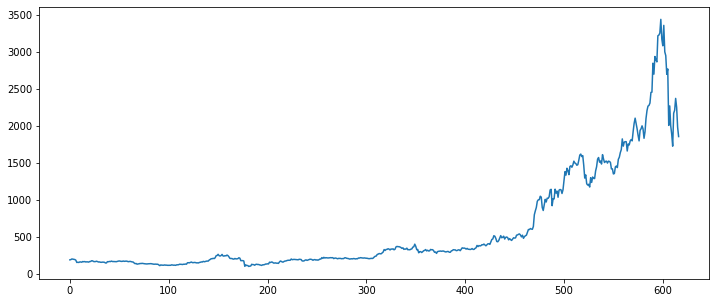

In [169]:
from datetime import datetime
data["Open"].plot(figsize=(12,5)) # Open Value of Ethereum Coin (USD) open from 2019 September till 2021 May 30.

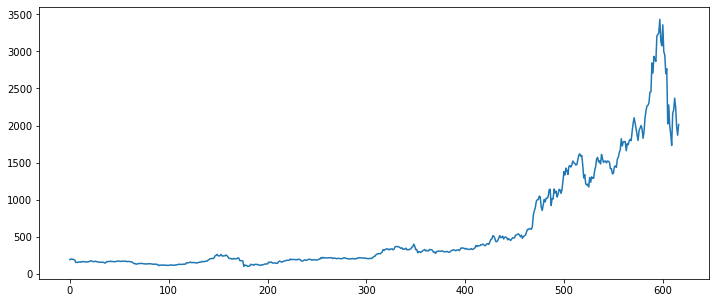

In [170]:
data["Close"].plot(figsize=(12,5)) # Close Value of Ethereum Coin (USD) open from 2019 September till 2021 May 30

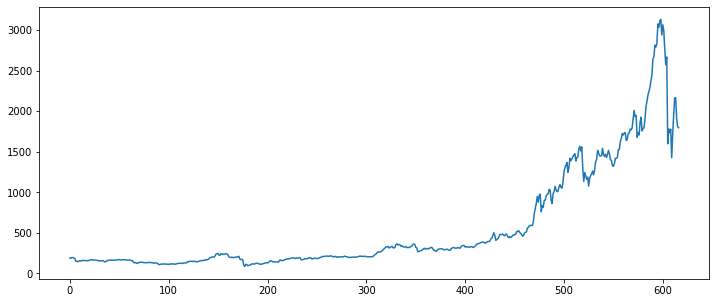

In [171]:
data["Low"].plot(figsize=(12,5)) # Low Value of Ethereum Coin (USD) open from 2019 September till 2021 May 30

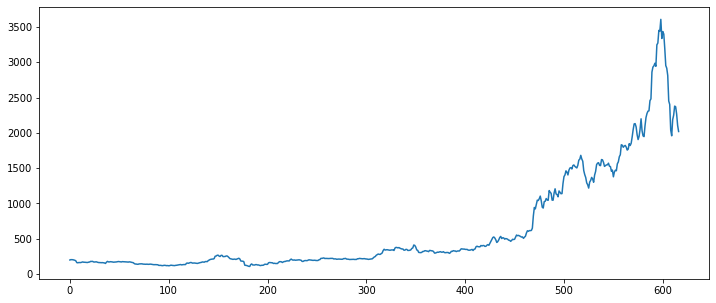

In [172]:
data["High"].plot(figsize=(12,5)) # High Value of Ethereum Coin (USD) open from 2019 September till 2021 May 30

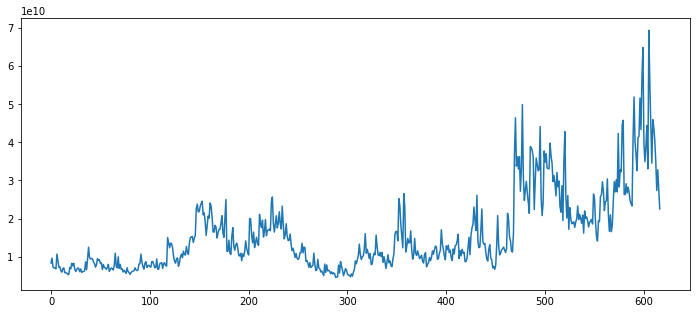

In [173]:
data["Volume"].plot(figsize=(12,5)) # Volume of Ethereum Coin (USD) open from 2019 September till 2021 May 30

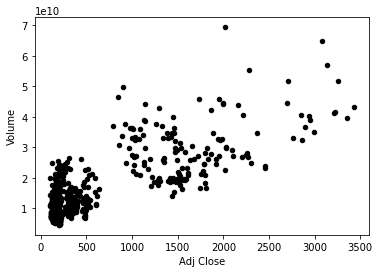

In [174]:
a1 = data.plot(kind = 'scatter', x='Adj Close', y ='Volume', color = 'black') # Scatter Plot
a1

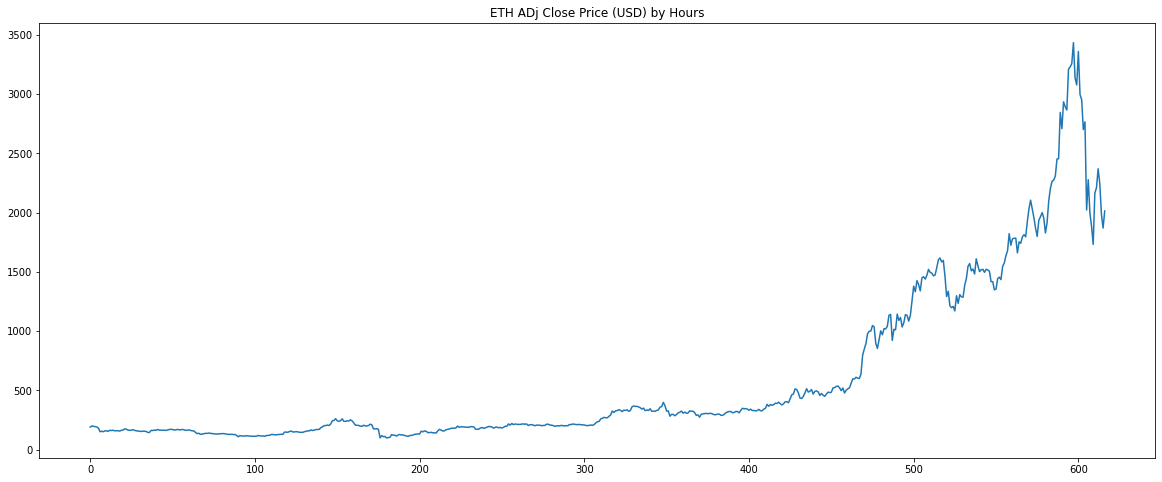

In [175]:
# ETH ADj Close Price (USD) by Hours
import matplotlib.pylab as plt
import seaborn as sbn
plt.figure(figsize=[20,8])
plt.title('ETH ADj Close Price (USD) by Hours')
plt.plot(data['Adj Close'], '-', label='By Hours')

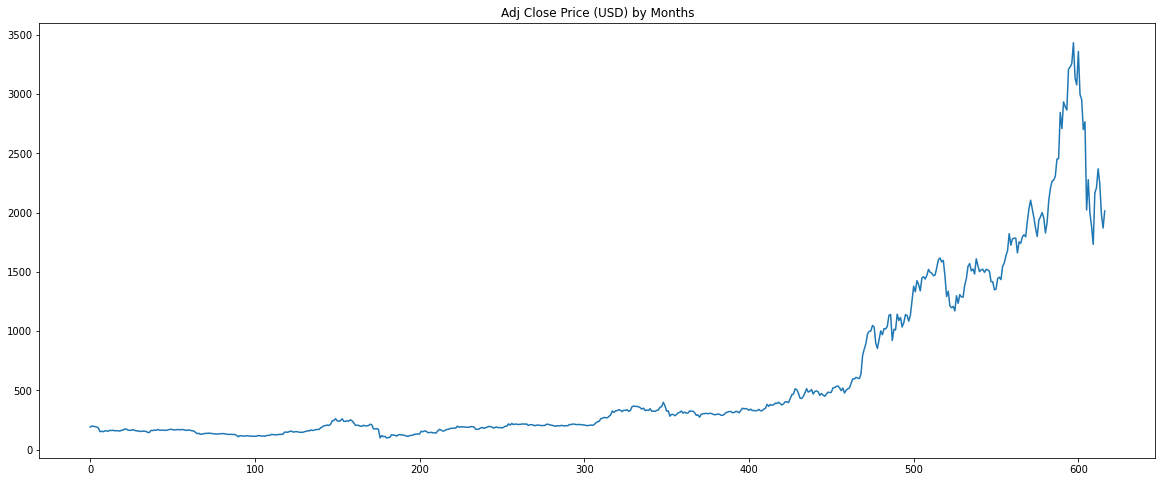

In [176]:
# Adj Close Price (USD) by Months
plt.figure(figsize=[20,8])
plt.title('Adj Close Price (USD) by Months')
plt.plot(data['Adj Close'], '-', label='By Months')

Decomposition

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models in our problem

All time series data can be broken down into four core components: the average value, a trend (i.e. an increasing mean), seasonality (i.e. a repeating cyclical pattern), and a residual (random noise). Trends and seasonality are not always present in time dependent data. The residual is what’s left over after trends and seasonality are removed. Time series models assume that the data is stationary and only the residual component satisfies the conditions for stationarity

https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

A. Additive Model :



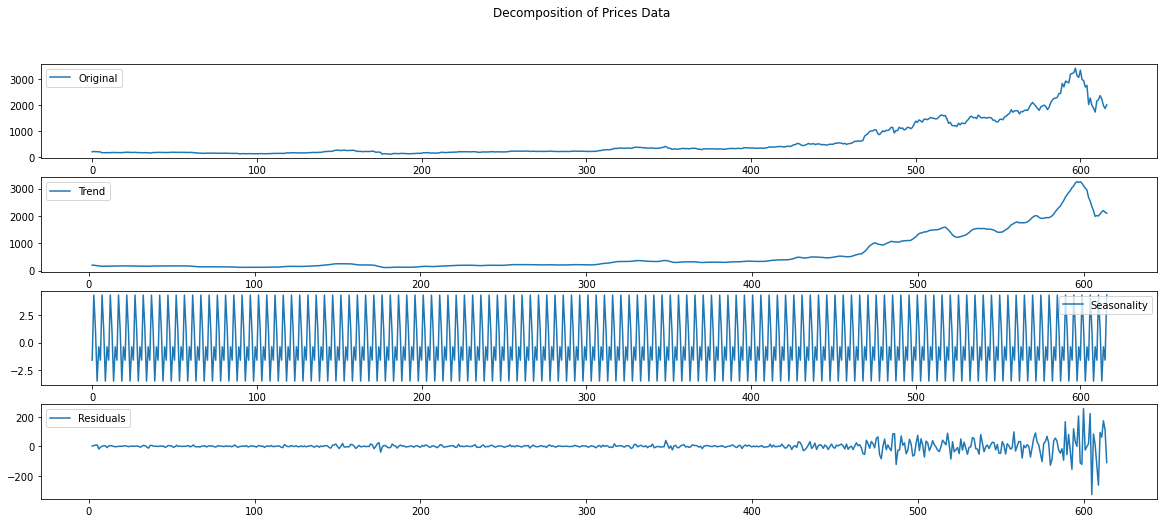

In [177]:
from statsmodels.tsa.seasonal import seasonal_decompose

# when frequency = 5 , additiove model 
decomposition = seasonal_decompose(data['Adj Close'], model='additive', freq = 5)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig = plt.figure(figsize=(20,8))
plt.subplot(411)
plt.plot(data['Adj Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()

B. Multiplicative Model: 

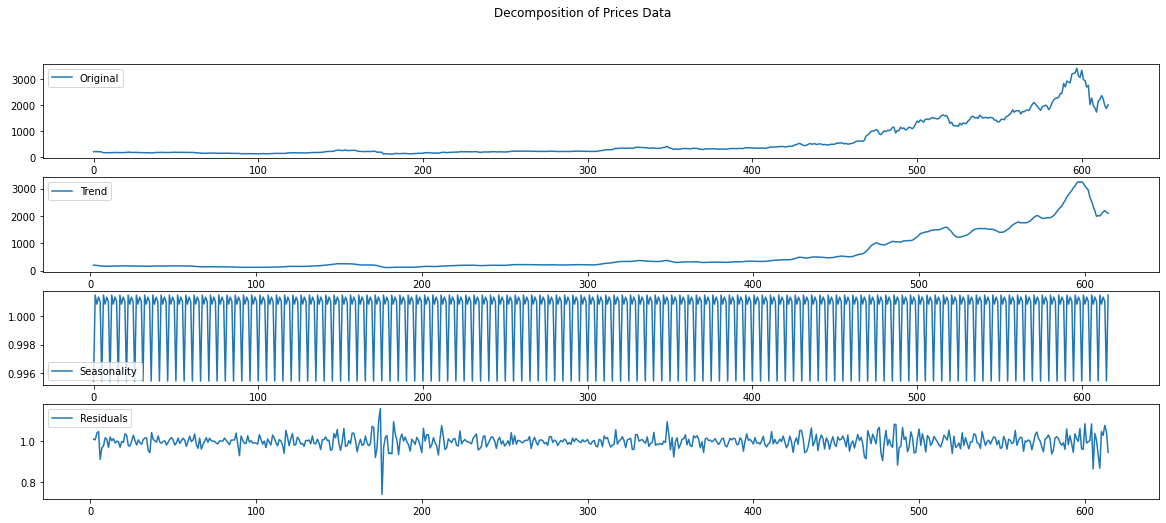

In [178]:
# when frequency = 5 , multiplicative model 
decomposition = seasonal_decompose(data['Adj Close'], model='multiplicative', freq = 5)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig = plt.figure(figsize=(20,8))
plt.subplot(411)
plt.plot(data['Adj Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()

Dickey-Fuller Test

Checking for the Stationary : ADFULLER TEST - (Dickey-Fuller) To find the observaton is stationary or not if the p Value is < 0.05 its stationary when the p value is > 0.05 its not stationary

Here we basically will find the Strong Evidence or Weak Evidence of Null Hypoyhesis Using P value.


https://machinelearningmastery.com/time-series-data-stationary-python/

In [179]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
     if dftest[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
     else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
print('OPEN USD- Ethereum Coin :')
ad_test(data['Open'])
print('CLOSE USD- Ethereum Coin :')
ad_test(data['Close'])
print('High USD-Ethereum Coin :')
ad_test(data['High'])
print("Low USD-Ethereum Coin :")
ad_test(data['Low'])


OPEN USD- Ethereum Coin :
1. ADF :  0.3464247698474791
2. P-Value :  0.9793769957123748
3. Num Of Lags :  16
4. Num Of Observations Used For ADF Regression: 600
5. Critical Values :
	 1% :  -3.4412958288564814
	 5% :  -2.8663691131481484
	 10% :  -2.5693418027777777
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
CLOSE USD- Ethereum Coin :
1. ADF :  1.3714382575879454
2. P-Value :  0.9969804480318893
3. Num Of Lags :  18
4. Num Of Observations Used For ADF Regression: 598
5. Critical Values :
	 1% :  -3.4413325959192393
	 5% :  -2.86638530474078
	 10% :  -2.569350430308386
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
High USD-Ethereum Coin :
1. ADF :  1.0207798483882355
2. P-Value :  0.9944804326019723
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression: 597
5. Critical Values :
	 1% :  -3.4413510722333087
	 5% :  -2.8663934413235266
	 10% :  -2.5693547658168003


Rolling Mean and Standard Deviation

In [180]:
RollingMean = data['Adj Close'].rolling(window = 12).mean()
RollingSTD = data['Adj Close'].rolling(window = 12).std()
print(RollingMean)
print(RollingSTD)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
612    2339.081543
613    2276.496440
614    2195.832621
615    2126.623088
616    2063.979360
Name: Adj Close, Length: 617, dtype: float64
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
612    422.644816
613    368.806761
614    308.363436
615    276.442156
616    190.260849
Name: Adj Close, Length: 617, dtype: float64


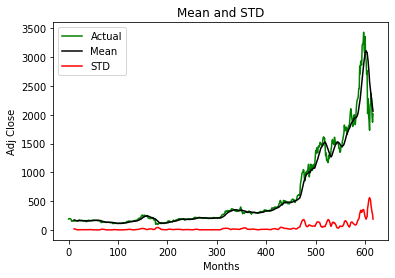

In [181]:
actual = plt.plot(data['Adj Close'], color = 'green', label='Actual')
mean = plt.plot(RollingMean, color = 'black', label='Mean')
std = plt.plot(RollingSTD, color = 'red', label='STD')
plt.legend(loc='best')
plt.title('Mean and STD')
plt.xlabel('Months')
plt.ylabel('Adj Close')
plt.show()

In [182]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data['Adj Close'])[1])

Dickey–Fuller test: p=0.996980


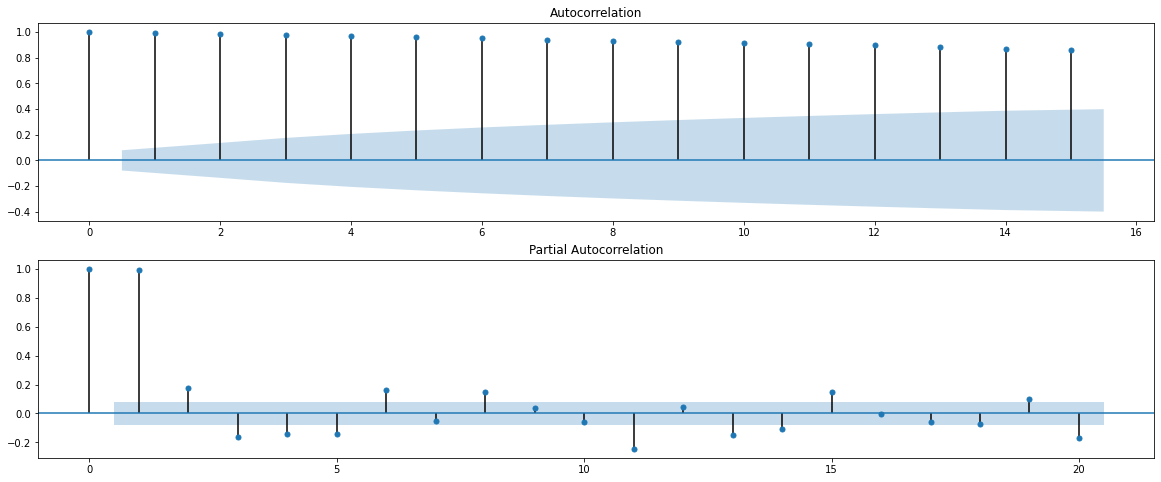

In [183]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))
pyplot.subplot(211)
plot_acf(data['Adj Close'], ax=pyplot.gca(),lags=15)
pyplot.subplot(212)
plot_pacf(data['Adj Close'], ax=pyplot.gca(), lags=20)
pyplot.show()

ARIMA Modelling 

ARIMA MODEL FOR FORECASTING AND PREDICTION
# **A**uto **R**egressive + I + **M**oving **A**verage which is **I**ntegrated = **ARIMA**
AR = Corellation between the previous time to the Current time
I=
M= 

AUTOREG REGRESSION:
This basically means that you are using the previous values of the time series in order to predict the future. How many past values you use, determine the order of the AR model. Here’s how an AR(1) model looks like: Y(t)= Some_Constant*Y(t-1)+ Another_Constant +Error(t)

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.


Here we are doing in a Stats Way . 

In [184]:
Qs = range(0, 2)
qs = range(0, 4)
Ps = range(0, 4)
ps = range(0, 2)
D=1
d=1
parameters = product(ps, qs, Ps, Qs) #SARIMAX model Parameters:(p,d,q)(sp,sd,sq,s) +exog
parameterslist = list(parameters)
len(parameterslist)
results = []
bestaic = float("inf")
warnings.filterwarnings("ignore")
for param in parameterslist:
    try:
        model=sm.tsa.statespace.SARIMAX(data['Adj Close'], order=(param[0], d, param[1]),seasonal_order=(param[2],D, param[3],12),enforce_stationarity=False,enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        continue
    aic = model.aic
    if aic < bestaic:
        model1 = model
        aic1 = aic
        param1 = param
    results.append([param, model.aic])


In [185]:
result = pd.DataFrame(results)
result.columns = ['parameters', 'aic']
print(result.sort_values(by = 'aic', ascending=True).head())
print(model1.summary())

      parameters          aic
47  (1, 1, 3, 1)  6375.848574
55  (1, 2, 3, 1)  6377.109609
63  (1, 3, 3, 1)  6379.066760
23  (0, 2, 3, 1)  6385.347306
31  (0, 3, 3, 1)  6387.319266
                                 Statespace Model Results                                 
Dep. Variable:                          Adj Close   No. Observations:                  617
Model:             SARIMAX(1, 1, 3)x(3, 1, 1, 12)   Log Likelihood               -3180.533
Date:                            Sun, 30 May 2021   AIC                           6379.067
Time:                                    20:36:32   BIC                           6418.130
Sample:                                         0   HQIC                          6394.312
                                            - 617                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

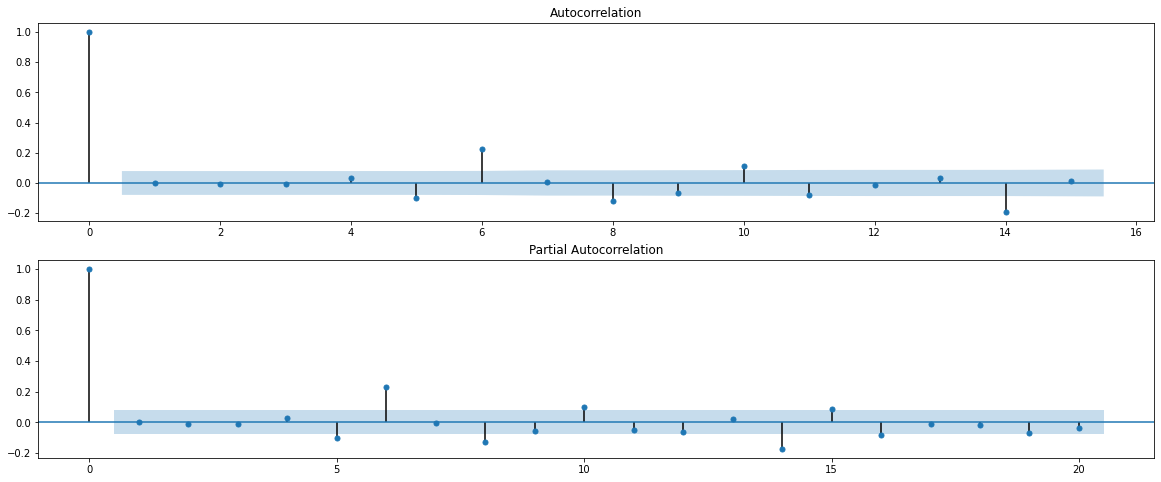

In [186]:
# Autocorrelation and Partial AutoCorrelation Plot for Residual
residual = model1.resid
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(residual,lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residual, lags = 20, ax=ax2)

Dickey Fuller test Statistic:   -7.277112e+00
P-Value:                         1.534162e-10
Lags Used:                       1.900000e+01
No. Of observations:             5.970000e+02
dtype: float64


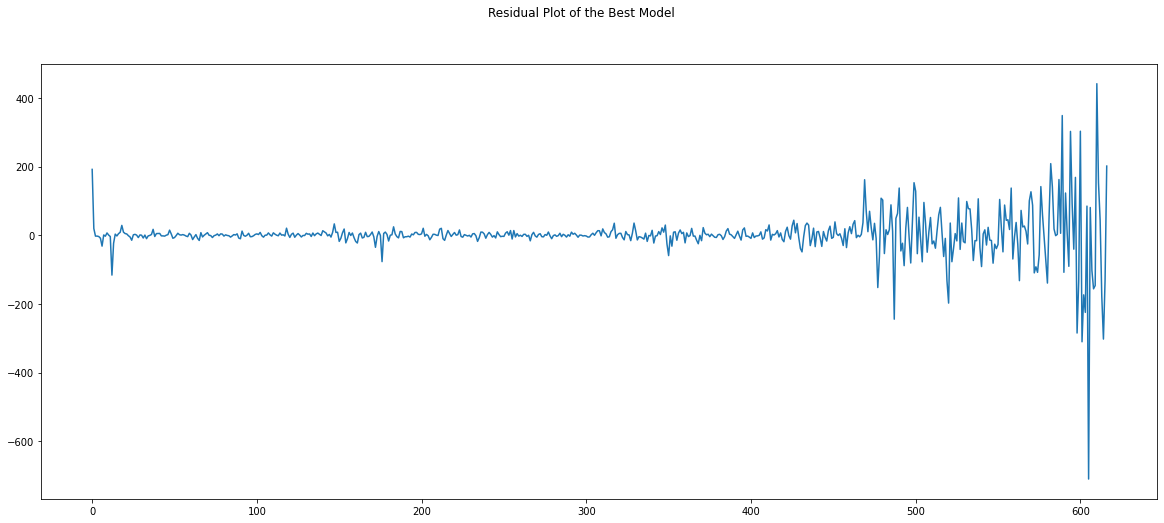

In [187]:
fig = plt.figure(figsize=(20,8))
model1.resid.plot()
fig.suptitle('Residual Plot of the Best Model')
test1 = adfuller(model1.resid, autolag='AIC') 
result1 = pd.Series(test1[0:4], index=['Dickey Fuller test Statistic:','P-Value:','Lags Used:','No. Of observations:'])
print(result1)

In [188]:
#model1.plot_diagnostics(figsize=(10, 10))

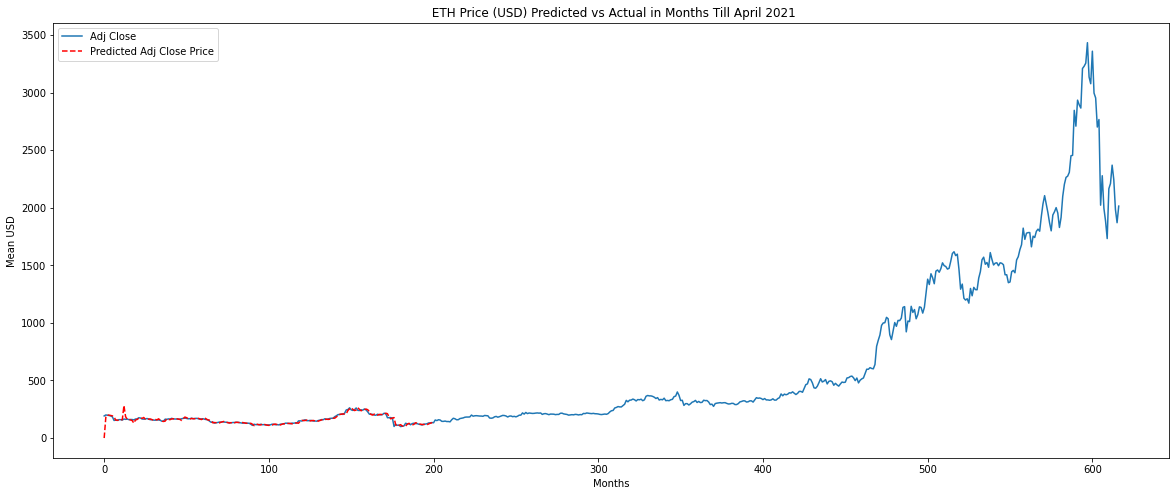

In [189]:
by_month = data[['Adj Close']]
upcoming = pd.DataFrame()
by_month = pd.concat([by_month,upcoming])
by_month['forecast'] = model1.predict(start=0, end=200)
plt.figure(figsize=(20,8))
plt.title(' ETH Price (USD) Predicted vs Actual in Months Till April 2021' )
plt.xlabel('Months')
plt.ylabel('Mean USD')
by_month['Adj Close'].plot()
by_month.forecast.plot(color='red', ls='--', label='Predicted Adj Close Price')
plt.legend()
plt.show()

# From This we can see that our Arima Model predicted to close to the Actual Ethereum Coin in USD Price. 